---
title: Months and Days
exports:
  - format: pdf
    template: arxiv_two_column
    output: pdf_builds/months_days.pdf
---

This notebook contains analysis on how different months and days of the month compare wrt. delays.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi
from helper_functions import group_data_reliability, hhmm_to_hour

### Loading the Data

In [2]:
# Load data
flights = pd.read_csv("data/filtered_flights.csv")

### Delay by Month
This section explores how flight delays vary across different months of the year, examining both average delays and on-time rates.


In [3]:
# Defining "on time" threshold as 15 minutes
on_time_threshold = 15

# Creating new variables saying whether a flight was delayed on departure and arrival, respectively
flights["dep_on_time"] = (flights["DEPARTURE_DELAY"] <= on_time_threshold).astype(int)
flights["arr_on_time"] = (flights["ARRIVAL_DELAY"] <= on_time_threshold).astype(int)

In [4]:
# Aggregating by month
summary_performance_month = group_data_reliability(flights, "MONTH")

# Sort by month number
summary_performance_month = summary_performance_month.sort_index()

Below is a table showing on time arrivals and departures as well as average arrival and departure delays by month.

In [5]:
# Create a formatted table
month_table = summary_performance_month[["n_flights",
                                         "arr_on_time_rate", "dep_on_time_rate",
                                         "mean_arr_delay", "mean_dep_delay"]
                                        ].rename(columns={
                                            "n_flights": "Total Flights",
                                            "arr_on_time_rate": "On Time Arrivals (Rate)",
                                            "dep_on_time_rate": "On Time Departures (Rate)",
                                            "mean_arr_delay": "Average Arrival Delay (Minutes)",
                                            "mean_dep_delay": "Average Departure Delay (Minutes)"
                                        }).reset_index()

# Add month names
month_names = {1: "January", 2: "February", 3: "March", 4: "April",
               5: "May", 6: "June", 7: "July", 8: "August",
               9: "September", 10: "October", 11: "November", 12: "December"}
month_table["Month"] = month_table["MONTH"].map(month_names)
month_table = month_table[["Month", "Total Flights", "On Time Arrivals (Rate)",
                           "On Time Departures (Rate)", "Average Arrival Delay (Minutes)",
                           "Average Departure Delay (Minutes)"]]

dfi.export(month_table, "figures/df_flights_months.png", table_conversion="matplotlib")
month_table


,Month,Total Flights,On Time Arrivals (Rate),On Time Departures (Rate),Average Arrival Delay (Minutes),Average Departure Delay (Minutes)
0,January,57331,0.799323,0.820307,6.296069,8.187103
1,February,51887,0.795536,0.799680,6.177883,9.521592
2,March,59381,0.804634,0.816911,5.908526,8.466741
3,April,58122,0.839579,0.832611,2.651358,7.409653
4,May,59821,0.809632,0.804283,5.022416,9.055392
5,June,60412,0.781914,0.775541,7.324353,11.772874
6,July,63052,0.767652,0.760864,7.791537,12.572607
7,August,62791,0.801962,0.797598,5.198773,9.902271
8,September,57850,0.867468,0.868643,0.189811,5.034868
9,November,56536,0.852413,0.839943,0.317161,7.087673


The same thing can be showed in a bar plot, which is easier to interpret and compare across months.

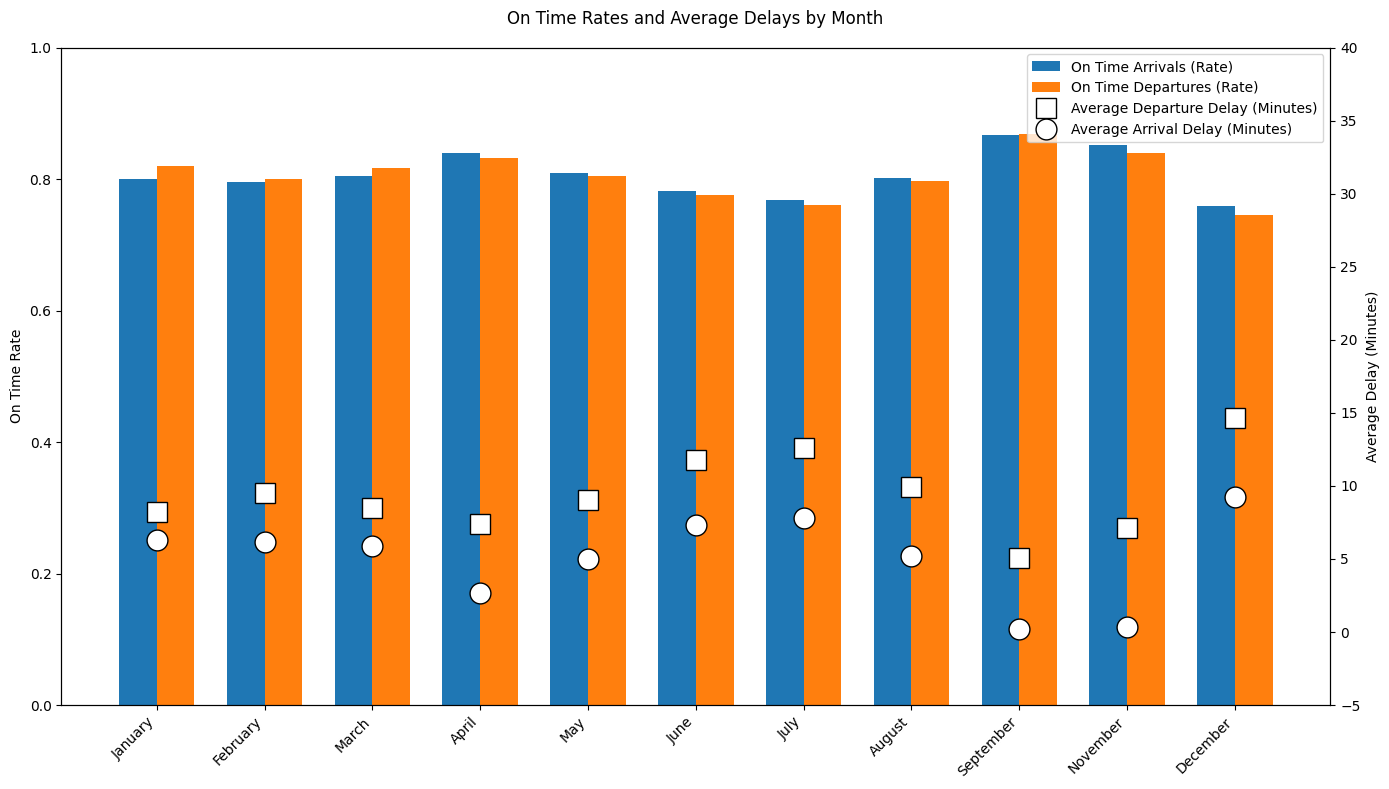

In [6]:
# Create bar chart for monthly delays
fig, ax1 = plt.subplots(figsize=(14, 8))

# On Time Rates
width = 0.35
x_pos = np.arange(len(summary_performance_month))
month_labels = [month_names[i] for i in summary_performance_month.index]

ax1.bar(x_pos - width/2, 
        summary_performance_month["arr_on_time_rate"], width, label="On Time Arrivals (Rate)")
ax1.bar(x_pos + width/2, 
        summary_performance_month["dep_on_time_rate"], width, label="On Time Departures (Rate)")
ax1.set_ylabel("On Time Rate")
ax1.set_ylim(0, 1)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(month_labels, rotation=45, ha="right")

# Average Delays
ax2 = ax1.twinx()
ax2.plot(x_pos, 
         summary_performance_month["mean_dep_delay"], marker="s", markersize=15, 
         linestyle="None", label="Average Departure Delay (Minutes)", 
         markerfacecolor="white", markeredgecolor="black")
ax2.plot(x_pos, 
         summary_performance_month["mean_arr_delay"], marker="o", markersize=15, 
         linestyle="None", label="Average Arrival Delay (Minutes)", 
         markerfacecolor="white", markeredgecolor="black")
ax2.set_ylim(-5, 40)
ax2.set_ylabel("Average Delay (Minutes)")

# Title
fig.suptitle("On Time Rates and Average Delays by Month")

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper right")

plt.tight_layout()

plt.savefig("figures/delays_by_month.png", dpi=300, bbox_inches='tight')

plt.show()

The plot shows a seasonal pattern in when flights are on time. On-time arrival and departure rates are highest in spring and early fall, when average delays are also at their lowest. In contrast, the summer months (June and July) and December show worse performance, with lower on-time rates and higher average delays. This indicates that increased demand during peak travel periods reduce reliability significantly, while less busy seasons result in more stable flight performance.

### Delay by Day of Month
This section explores how flight delays vary across the days of the months, examining both average delays and on-time rates.

In [7]:
# Aggregating by day of month
summary_performance_day = group_data_reliability(flights, "DAY")

# Sort by day number
summary_performance_day = summary_performance_day.sort_index()


Below is a table showing on time arrivals and departures as well as average arrival and departure delays by day of the month.

In [8]:
# Create a formatted table
day_table = summary_performance_day[["n_flights",
                                     "arr_on_time_rate", "dep_on_time_rate",
                                     "mean_arr_delay", "mean_dep_delay"]
                                    ].rename(columns={
                                        "n_flights": "Total Flights",
                                        "arr_on_time_rate": "On Time Arrivals (Rate)",
                                        "dep_on_time_rate": "On Time Departures (Rate)",
                                        "mean_arr_delay": "Average Arrival Delay (Minutes)",
                                        "mean_dep_delay": "Average Departure Delay (Minutes)"
                                    }).reset_index()

day_table = day_table.rename(columns={"DAY": "Day of Month"})
day_table = day_table[["Day of Month", "Total Flights", "On Time Arrivals (Rate)",
                       "On Time Departures (Rate)", "Average Arrival Delay (Minutes)",
                       "Average Departure Delay (Minutes)"]]

dfi.export(month_table, "figures/df_flights_days.png", table_conversion="matplotlib")
day_table


,Day of Month,Total Flights,On Time Arrivals (Rate),On Time Departures (Rate),Average Arrival Delay (Minutes),Average Departure Delay (Minutes)
0,1,20900,0.815550,0.810383,4.688888,9.224856
1,2,21739,0.788859,0.785455,6.144059,10.541512
2,3,21449,0.815516,0.813231,4.132903,8.606191
3,4,21165,0.809213,0.803449,4.840499,9.329607
4,5,21052,0.800732,0.803914,5.884538,9.808428
5,6,21171,0.799868,0.801049,5.385201,9.328209
6,7,20627,0.839337,0.837107,1.813376,6.513215
7,8,21371,0.798418,0.794020,5.673279,10.212737
8,9,21470,0.812902,0.809921,4.081258,8.795746
9,10,21348,0.814737,0.805556,3.956448,9.148429


The same thing can be showed in a plot, which is easier to interpret and compare across days.

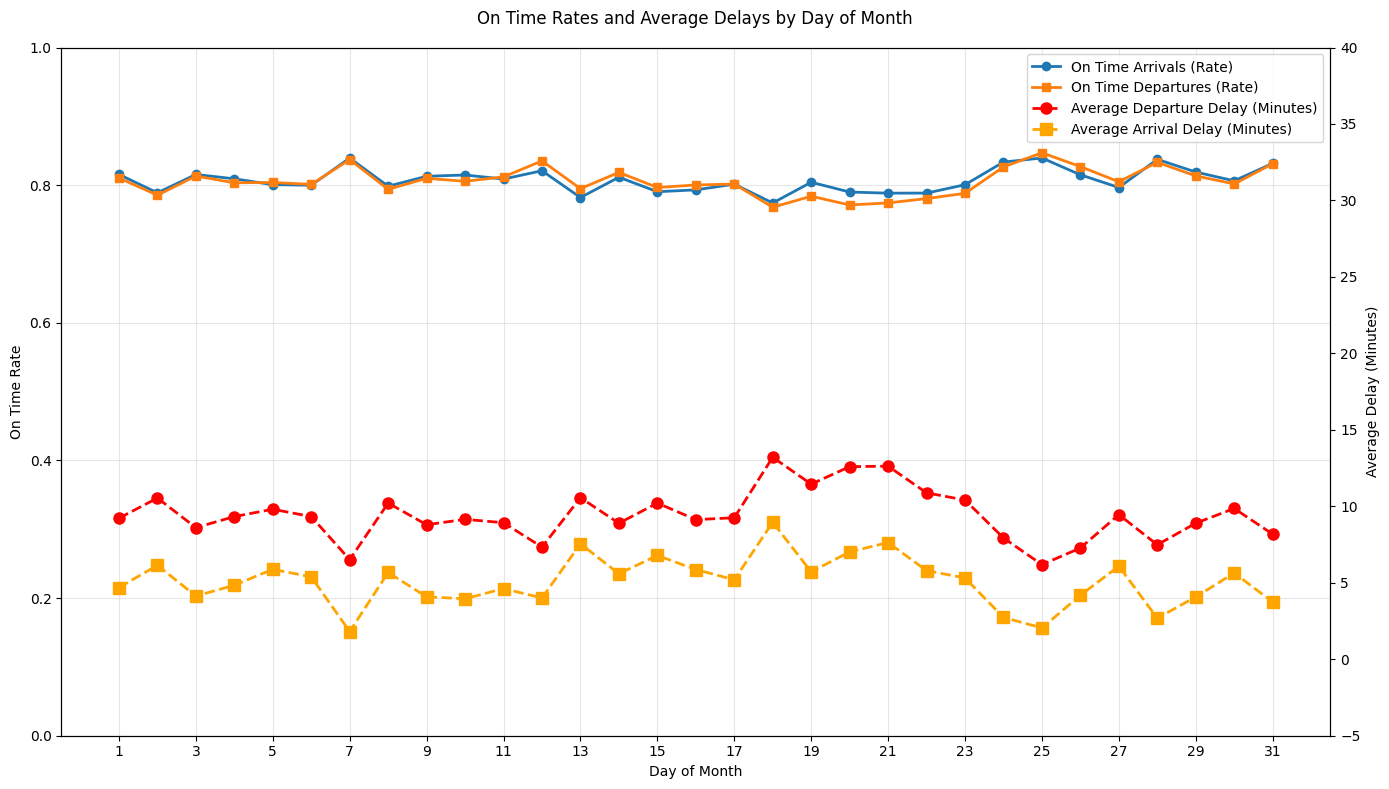

In [9]:
# Create line plot for delays by day of month
fig, ax1 = plt.subplots(figsize=(14, 8))

# On Time Rates
ax1.plot(summary_performance_day.index, 
         summary_performance_day["arr_on_time_rate"], 
         marker="o", label="On Time Arrivals (Rate)", linewidth=2)
ax1.plot(summary_performance_day.index, 
         summary_performance_day["dep_on_time_rate"], 
         marker="s", label="On Time Departures (Rate)", linewidth=2)
ax1.set_ylabel("On Time Rate")
ax1.set_ylim(0, 1)
ax1.set_xlabel("Day of Month")
ax1.set_xticks(range(1, 32, 2))
ax1.grid(True, alpha=0.3)

# Average Delays
ax2 = ax1.twinx()
ax2.plot(summary_performance_day.index, 
         summary_performance_day["mean_dep_delay"], 
         marker="o", markersize=8, label="Average Departure Delay (Minutes)", 
         linestyle="--", linewidth=2, color="red")
ax2.plot(summary_performance_day.index, 
         summary_performance_day["mean_arr_delay"], 
         marker="s", markersize=8, label="Average Arrival Delay (Minutes)", 
         linestyle="--", linewidth=2, color="orange")
ax2.set_ylim(-5, 40)
ax2.set_ylabel("Average Delay (Minutes)")

# Title
fig.suptitle("On Time Rates and Average Delays by Day of Month")

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper right")

plt.tight_layout()

plt.savefig("figures/delays_by_day.png", dpi=300, bbox_inches='tight')

plt.show()

The plot shows that flight delays are relatively stable across the days of the month, with on-time arrival and departure rates generally being around 80%. However, average delays show clearer fluctuations, with a noticeable increase around the middle of the 18.-21., where both arrival and departure delays are highest. This indicates that while airlines have consistent reliability throughout the month, something happens in the middle of the month that tends to increase delay durations.

### Delay by Day of Week
This section explores how flight delays vary across the days of the week, examining both average delays and on-time rates.

In [10]:
# In the original Kaggle flights data, DAY_OF_WEEK is:
# 1 = Monday, 2 = Tuesday, ..., 7 = Sunday

summary_performance_dow = group_data_reliability(flights, "DAY_OF_WEEK")
summary_performance_dow = summary_performance_dow.sort_index()

# Map numeric day of week to names
dow_names = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday"
}

Below is a table showing on time arrivals and departures as well as average arrival and departure delays by day of the week.

In [11]:
dow_table = (
    summary_performance_dow[
        ["n_flights", "arr_on_time_rate", "dep_on_time_rate",
         "mean_arr_delay", "mean_dep_delay"]
        ]
    .rename(columns={
        "n_flights": "Total Flights",
        "arr_on_time_rate": "On Time Arrivals (Rate)",
        "dep_on_time_rate": "On Time Departures (Rate)",
        "mean_arr_delay": "Average Arrival Delay (Minutes)",
        "mean_dep_delay": "Average Departure Delay (Minutes)"
    })
    .reset_index()
)

dow_table["Day of Week"] = dow_table["DAY_OF_WEEK"].map(dow_names)
dow_table = dow_table[
    ["Day of Week", "Total Flights",
     "On Time Arrivals (Rate)", "On Time Departures (Rate)",
     "Average Arrival Delay (Minutes)", "Average Departure Delay (Minutes)"]
]

dfi.export(month_table, "figures/df_flights_dow.png", table_conversion="matplotlib")
dow_table

,Day of Week,Total Flights,On Time Arrivals (Rate),On Time Departures (Rate),Average Arrival Delay (Minutes),Average Departure Delay (Minutes)
0,Monday,96629,0.786027,0.784971,6.850157,10.984757
1,Tuesday,94515,0.816241,0.813585,3.983212,8.448567
2,Wednesday,95664,0.827762,0.823037,3.215092,7.749026
3,Thursday,95754,0.791299,0.790724,6.413493,10.461795
4,Friday,94493,0.796768,0.795625,6.237937,10.356115
5,Saturday,77066,0.853463,0.852075,1.479301,6.348848
6,Sunday,90829,0.784309,0.783439,7.056912,11.328469


The same thing can be showed in a plot, which is easier to interpret and compare across days.

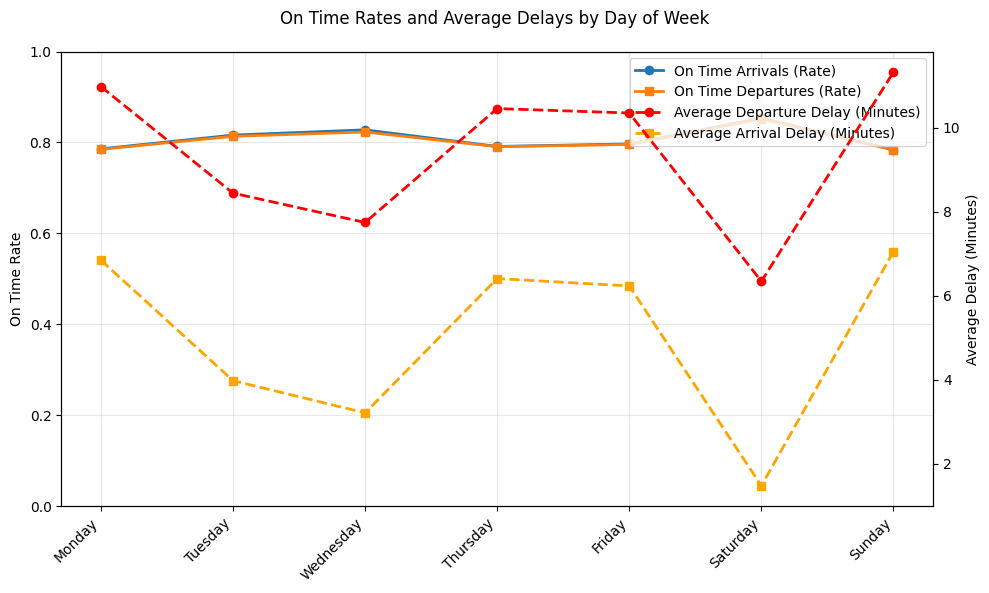

In [12]:
# Plot: on-time rates and delays by day of week

fig, ax1 = plt.subplots(figsize=(10, 6))

x_pos = np.arange(1, 8)
dow_labels = [dow_names[i] for i in x_pos]

# On time rates
ax1.plot(
    x_pos,
    summary_performance_dow["arr_on_time_rate"],
    marker="o",
    linewidth=2,
    label="On Time Arrivals (Rate)",
)
ax1.plot(
    x_pos,
    summary_performance_dow["dep_on_time_rate"],
    marker="s",
    linewidth=2,
    label="On Time Departures (Rate)",
)
ax1.set_ylabel("On Time Rate")
ax1.set_ylim(0, 1)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(dow_labels, rotation=45, ha="right")
ax1.grid(True, alpha=0.3)

# Average delays
ax2 = ax1.twinx()
ax2.plot(
    x_pos,
    summary_performance_dow["mean_dep_delay"],
    marker="o",
    linestyle="--",
    linewidth=2,
    color="red",
    label="Average Departure Delay (Minutes)",
)
ax2.plot(
    x_pos,
    summary_performance_dow["mean_arr_delay"],
    marker="s",
    linestyle="--",
    linewidth=2,
    color="orange",
    label="Average Arrival Delay (Minutes)",
)
ax2.set_ylabel("Average Delay (Minutes)")

fig.suptitle("On Time Rates and Average Delays by Day of Week")

# Combined legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="upper right")

plt.tight_layout()

plt.savefig("figures/delays_by_dow.png", dpi=300, bbox_inches="tight")

plt.show()

Here we see clear differences in flight performance across the days of the week. On-time arrival and departure rates are highest during the middle of the week, indicating more stable operations during these days. Weekends show more mixed performance, where Saturday has relatively comparable on-time rates but the lowest average arrival delays. Mondays also stand out with higher delay times despite moderate on-time rates, probably showing schedule recovery effects from weekend disruptions.

## Time-of-Day Delay Analysis

This section is about how flight behavior changes throughout the day and analyzing the reliability of flight times. Using a helper function to convert the departure time into an hour of the day, and assuming flights within the same hour are, on average, comparable and that time of day can show us operational constraints like congestion or dispersal of flights, allows us to aggregate performance metrics at an hourly level. This will give us a clear idea of how operational constraints affect flight reliability over the course of a typical day.

In [13]:
#Time-of-day delay analysis (using scheduled departure hour)

time_col = "SCHEDULED_DEPARTURE"

#Convert departure time (HHMM) into hour of day (0-23)
flights["dep_hour"] = flights[time_col].apply(hhmm_to_hour)

#Drop missing values in table
flights_hour = flights.dropna(subset=["dep_hour"]).copy()
flights_hour["dep_hour"] = flights_hour["dep_hour"].astype(int)

#add in performance metric by hour of day
summary_performance_by_hour = (
    group_data_reliability(flights_hour, "dep_hour").sort_index()
)

dfi.export(summary_performance_by_hour, "figures/df_delays_by_hour.png", table_conversion="matplotlib")

summary_performance_by_hour

,mean_dep_delay,mean_arr_delay,dep_on_time_rate,arr_on_time_rate,n_flights
dep_hour,,,,,
0,8.297591,2.002132,0.823492,0.836024,4708
1,6.772006,4.116883,0.839489,0.799716,704
5,1.578130,-5.209951,0.936592,0.932824,9289
6,1.530847,-3.722909,0.935369,0.926764,50904
7,2.114243,-2.723818,0.921236,0.904097,40082
8,5.020384,0.705051,0.882955,0.862004,47110
9,6.398356,2.725028,0.856498,0.842113,40529
10,9.259322,5.322866,0.817874,0.813380,47846
11,10.046378,6.099747,0.800188,0.800995,37180


The same thing can be showed in a plot, which is easier to interpret and compare across hours.

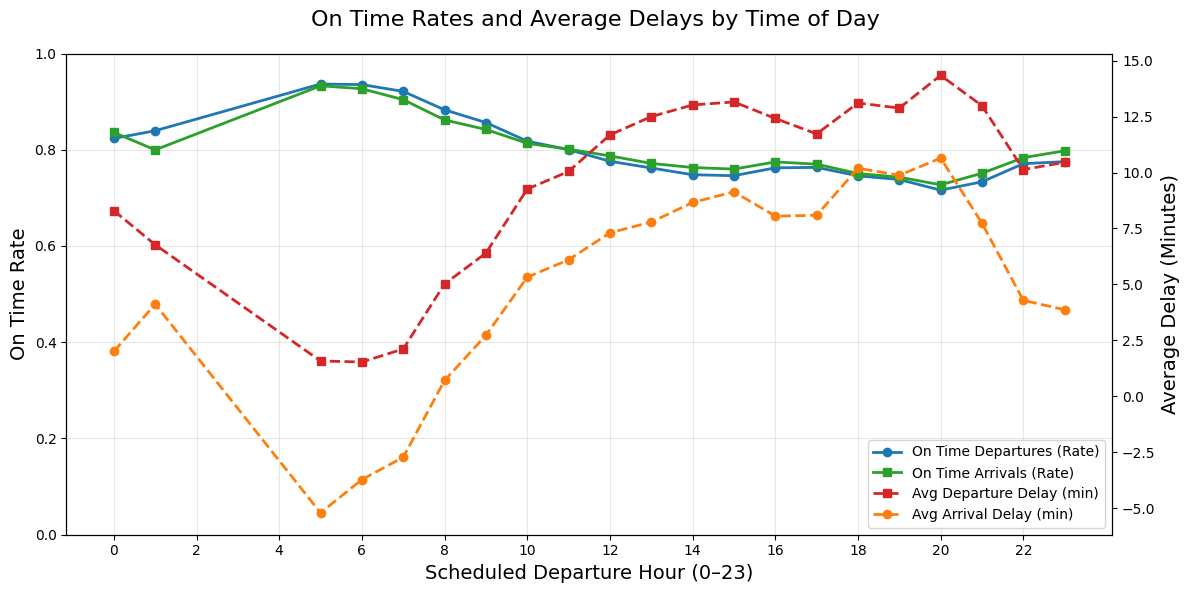

In [14]:
#plot

# plot on-time rates and average delays by time of day
fig, ax1 = plt.subplots(figsize=(12, 6))
hours = summary_performance_by_hour.index.to_numpy()

# On-time rates
ax1.plot(
    hours,
    summary_performance_by_hour["dep_on_time_rate"],
    marker="o",
    linewidth=2,
    color = "tab:blue",
    label="On Time Departures (Rate)",
)
ax1.plot(
    hours,
    summary_performance_by_hour["arr_on_time_rate"],
    marker="s",
    linewidth=2,
    color = "tab:green",
    label="On Time Arrivals (Rate)",
)

ax1.set_xlabel("Scheduled Departure Hour (0–23)", fontsize=14)
ax1.set_ylabel("On Time Rate",fontsize=14)
ax1.set_ylim(0, 1)
ax1.set_xticks(range(0, 24, 2))
ax1.grid(True, alpha=0.3)

# Average delays (second y-axis)
ax2 = ax1.twinx()
ax2.plot(
    hours,
    summary_performance_by_hour["mean_dep_delay"],
    linestyle="--",
    linewidth=2,
    marker="s",
    color = "tab:red",
    label="Avg Departure Delay (min)",
)
ax2.plot(
    hours,
    summary_performance_by_hour["mean_arr_delay"],
    linestyle="--",
    linewidth=2,
    marker="o",
    color = "tab:orange",
    label="Avg Arrival Delay (min)",
)
ax2.set_ylabel("Average Delay (Minutes)", fontsize=14)

# Title and legend and save
fig.suptitle("On Time Rates and Average Delays by Time of Day", fontsize=16)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="lower right")

plt.tight_layout()
fig.savefig("figures/delays_by_hour.png", dpi=300, bbox_inches="tight")
plt.show()


Graph Description: The Left Y-axis is the on-time rate which is any flight that is only delayed by 15 minutes or less. The right Y-axis is the average minutes of delay for flights delayed 15 minutes or more. This graph shows how often flights are on time during the day as well as how bad the delays are when they do happen simultaneously. This graph is highlighting reliability and severity.

Graph Patterns: At around 5am, the on-time rates are the highest and the delays are the lowest which suggest that this is the "starting time" for many airports, their staff and travelers. In other words, this would be the begining of the day's flights as if they start from zero and continue on so there is no previous flight to delay them at this time. The later flights after this, can be affected by congestion or delay build ups.

From about 7am to the end of the day, the graph shows that reliability is declining since the on-time departures and arrivals decreases while the average delays increase. This indicates delay propagation in which all the small delays from early morning start to accumulate and lead to longer delays for later flights. The worst performance for reliability and severity is around hour 18 to 21 (6pm to 9pm) in which the average delay reaches almost 15 minutes pass the already set delay definition. In this case, a flight in this time frame could be delayed at least almost 30 minutes from its original departure time.

Overall, the daily pattern is that early morning flights are the most reliable with shortest delays and flights between peak evening hours of 6pm to 9pm are the least reliable with the longest delays for this specific dataset. 